In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_trainc=df_train.copy()
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
df_testc=df_test.copy()
df_testc["Survived"]=np.NaN
alldata=pd.concat([df_trainc,df_testc])

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [39]:
df_trainc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_trainc=df_train.dropna()
print(df_trainc.value_counts())

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [42]:
df_trainc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_trainc.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: xlabel='Survived'>

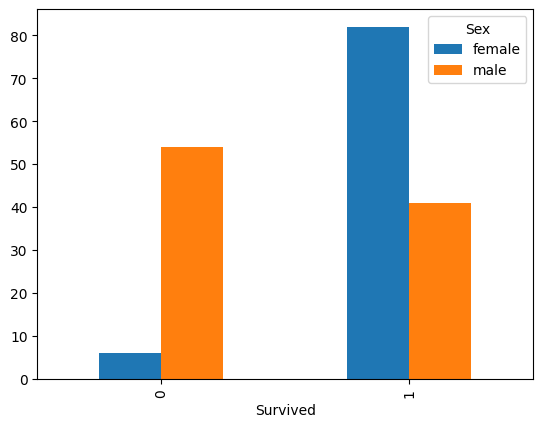

In [13]:
z=pd.pivot_table(df_trainc,index="Survived",columns="Sex",values="Ticket",aggfunc="count")
z.plot(kind="bar")

<Axes: xlabel='Survived'>

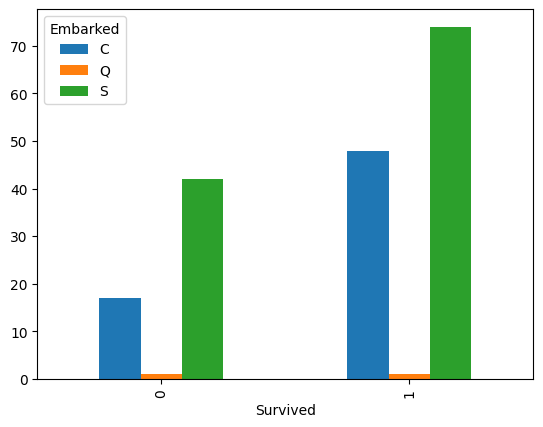

In [14]:
z=pd.pivot_table(df_trainc,index="Survived",columns="Embarked",values="Ticket",aggfunc="count")
z.plot(kind="bar")

<Axes: xlabel='Survived'>

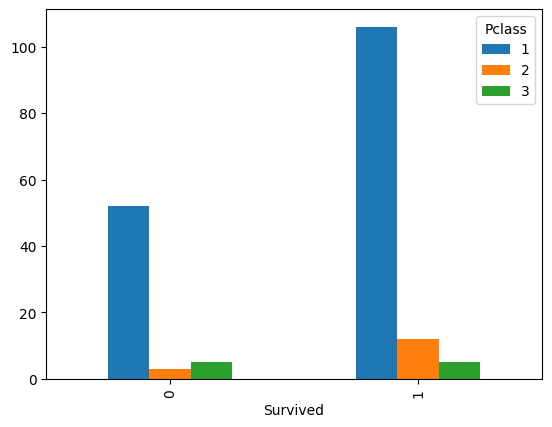

In [16]:
z=pd.pivot_table(df_trainc,index="Survived",columns="Pclass",values="Ticket",aggfunc="count")
z.plot(kind="bar")

(array([10.,  6., 32., 30., 40., 24., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <BarContainer object of 10 artists>)

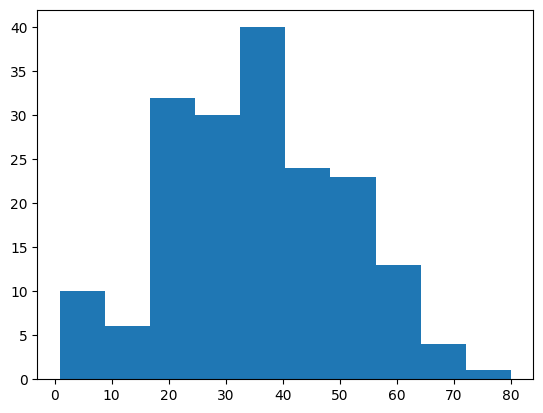

In [37]:
plt.hist(df_trainc["Age"])

In [17]:
z=pd.pivot_table(df_trainc,index="Survived",columns="Age",values="Ticket",aggfunc="count")
print(z)

Age       0.92   1.00   2.00   3.00   4.00   6.00   11.00  14.00  15.00  \
Survived                                                                  
0           NaN    NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN   
1           1.0    1.0    1.0    1.0    3.0    1.0    1.0    1.0    1.0   

Age       16.00  ...  58.00  60.00  61.00  62.00  63.00  64.00  65.00  70.00  \
Survived         ...                                                           
0           NaN  ...    2.0    NaN    2.0    1.0    NaN    1.0    2.0    1.0   
1           3.0  ...    3.0    2.0    NaN    NaN    1.0    NaN    NaN    NaN   

Age       71.00  80.00  
Survived                
0           1.0    NaN  
1           NaN    1.0  

[2 rows x 63 columns]


In [18]:
num=df_trainc[["Age","SibSp","Parch","Fare"]]
print(num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.156162 -0.271271 -0.092424
SibSp -0.156162  1.000000  0.255346  0.286433
Parch -0.271271  0.255346  1.000000  0.389740
Fare  -0.092424  0.286433  0.389740  1.000000


In [19]:
print(df_trainc["Sex"].value_counts())

Sex
male      95
female    88
Name: count, dtype: int64


In [20]:
print(df_trainc["Survived"].value_counts())

Survived
1    123
0     60
Name: count, dtype: int64


In [21]:
df_testc.isnull().sum()

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [22]:
df_testc=df_testc.dropna()
print(df_testc.value_counts())

Series([], Name: count, dtype: int64)


In [29]:
df=pd.get_dummies(df_trainc)
print(df)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
1              2         1       1  38.0      1      0  71.2833   
3              4         1       1  35.0      1      0  53.1000   
6              7         0       1  54.0      0      0  51.8625   
10            11         1       3   4.0      1      1  16.7000   
11            12         1       1  58.0      0      0  26.5500   
..           ...       ...     ...   ...    ...    ...      ...   
871          872         1       1  47.0      1      1  52.5542   
872          873         0       1  33.0      0      0   5.0000   
879          880         1       1  56.0      0      1  83.1583   
887          888         1       1  19.0      0      0  30.0000   
889          890         1       1  26.0      0      0  30.0000   

     Name_Allen, Miss. Elisabeth Walton  Name_Allison, Master. Hudson Trevor  \
1                                 False                                False   
3                                 F

In [30]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Allen, Miss. Elisabeth Walton","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740,0.082927,-0.044938,-0.047345,...,0.073601,-0.025329,-0.119138,-0.076171,-0.022982,-0.145233,-0.034709,-0.034101,-0.053701,0.045466
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241,0.051771,0.051771,-0.106131,...,-0.106131,-0.150506,-0.001503,0.090167,0.073417,-0.054813,-0.106131,0.104870,-0.038544,-0.095861
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235,-0.027593,-0.027593,-0.027593,...,0.260955,0.370065,0.203217,0.203217,0.165467,0.526266,-0.027593,-0.231837,-0.039131,0.238755
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424,-0.031712,-0.165128,-0.159996,...,0.030055,-0.092136,-0.180736,-0.055231,-0.223524,-0.200495,0.044308,0.085018,0.019038,-0.088568
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433,-0.053596,0.061793,0.061793,...,-0.053596,-0.076005,0.040632,-0.093345,0.251263,0.008265,-0.053596,-0.056723,0.169446,0.019780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,-0.145233,-0.054813,0.526266,-0.200495,0.008265,0.153865,-0.127816,-0.011081,-0.011081,-0.011081,...,-0.011081,-0.015714,-0.019299,-0.019299,-0.015714,1.000000,-0.011081,-0.110948,-0.015714,0.113609
Cabin_T,-0.034709,-0.106131,-0.027593,0.044308,-0.053596,-0.046827,-0.042040,-0.005495,-0.005495,-0.005495,...,-0.005495,-0.007792,-0.009569,-0.009569,-0.007792,-0.011081,1.000000,-0.055015,-0.007792,0.056334
Embarked_C,-0.034101,0.104870,-0.231837,0.085018,-0.056723,-0.074372,0.240382,-0.055015,-0.055015,-0.055015,...,-0.055015,-0.078017,-0.095816,-0.095816,-0.078017,-0.110948,-0.055015,1.000000,-0.078017,-0.976579
Embarked_Q,-0.053701,-0.038544,-0.039131,0.019038,0.169446,-0.066406,0.015625,-0.007792,-0.007792,-0.007792,...,-0.007792,-0.011050,-0.013571,-0.013571,-0.011050,-0.015714,-0.007792,-0.078017,1.000000,-0.138314
